In [1]:
import matplotlib._color_data as mcd
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np
import pandas as pd
import os
os.chdir("C:\\Users\\Zber\\Documents\\Dev_program\\OpenRadar")

from sklearn.metrics import roc_curve, auc, det_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from scipy.special import softmax
import matplotlib.ticker as ticker

In [19]:
n_classes = 7
classes = [i for i in range(7)]
lw = 3
res_path = "C:/Users/Zber/Documents/Dev_program/OpenRadar/FER/results"
camera_path = os.path.join(res_path,"Evaluate_camera_pose_outputs_20220703-152718")
our_path = os.path.join(res_path,"Evaluate_ours_Distance_100cm_v1_20220606-215241")
our_path1 = os.path.join(res_path,"Evaluate_ours_Distance_100cm_v0_20220606-215227")
our_path2 = os.path.join(res_path,"Evaluate_ours_Distance_100cm_v2_20220606-215255")
camera_dark_path = os.path.join(res_path,"Evaluate_camera_in_dark_outputs_20220703-003515")
our_dark_path1 = os.path.join(res_path,"Evaluate_oldData_ours_W1_v1_20220604-231908")
our_dark_path2 = os.path.join(res_path,"Evaluate_oldData_ours_W2_v2_20220604-232315")
our_dark_path3 = os.path.join(res_path,"Evaluate_oldData_ours_W3_v1_20220604-231953")
our_dark_path4 = os.path.join(res_path,"Evaluate_oldData_ours_W1_v3_20220604-225433")

In [20]:
all = [camera_path, [our_path, our_path1, our_path2], camera_dark_path, 
        [our_dark_path1,our_dark_path2,our_dark_path3,our_dark_path4]]
f_micro = []
t_micro = []
roc_auc = []
ii = 0
for path in all:
    if isinstance(path, list):
        ys = []
        yt = []
        for pp in path:
            csv_path = os.path.join(pp,'metrics.csv')
            output_path = os.path.join(pp, 'outputs.npy')
            y_score = softmax(np.load(output_path), axis=1)

            df = pd.read_csv (csv_path, sep='\t')
            y_target = np.asarray(df['target'],dtype=int)
            y_target= label_binarize(y_target, classes=classes)
            ys.append(y_score)
            yt.append(y_target)

        y_target = np.concatenate(yt, axis=0)
        y_score = np.concatenate(ys, axis=0)

        fpr, tpr, _ = roc_curve(y_target.ravel(), y_score.ravel())
        f_micro.append(fpr)
        t_micro.append(tpr)
        roc_auc.append(auc(fpr, tpr))
    else:
        csv_path = os.path.join(path,'metrics.csv')
        output_path = os.path.join(path, 'outputs.npy')
        y_score = softmax(np.load(output_path), axis=1)

        df = pd.read_csv (csv_path, sep='\t')
        y_target = np.asarray(df['target'],dtype=int)
        y_target= label_binarize(y_target, classes=classes)

        fpr, tpr, _ = roc_curve(y_target.ravel(), y_score.ravel())
        f_micro.append(fpr)
        t_micro.append(tpr)
        roc_auc.append(auc(fpr, tpr))


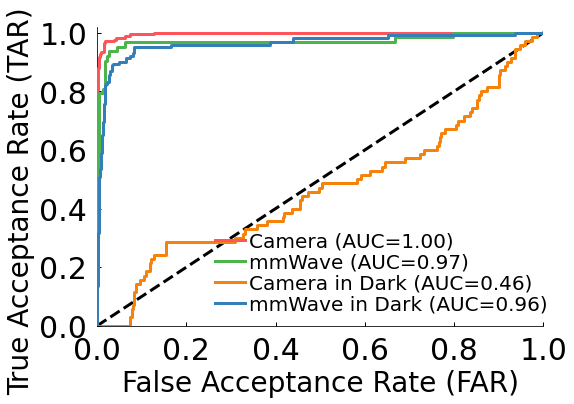

In [21]:
fig, ax = plt.subplots(figsize=(8, 5.5))
colors = ["#FF545A", "#4CB44C", "#F4820B",  "#337FBA", "#C775FF"]
label = ['Camera', 'mmWave', 'Camera in Dark', 'mmWave in Dark']

lw = 3

i = 0

for fpr, tpr, roc, c in zip(f_micro, t_micro, roc_auc, colors):
    if label[i] == 'Ours':
        zr = 10
    else:
        zr = 5
    ax.plot(fpr, tpr, c=c, linewidth=lw,
            label="{} (AUC={:.2f})".format(label[i], roc), zorder=zr)
    i = i+1

ax.plot([0, 1], [0, 1], "k--", lw=lw)


# ax.set_ylabel("True positive rate", fontsize=35)
ax.set_ylabel("True Acceptance Rate (TAR)", fontsize=28, y=0.42)
# ax.set_xlabel("False positive rate", fontsize=35)
ax.set_xlabel("False Acceptance Rate (FAR)", fontsize=28)
ax.xaxis.set_tick_params(labelsize=30, length=4,
                         direction='in', width=1, pad=10)
ax.yaxis.set_tick_params(labelsize=30, length=4,
                         direction='in', width=1, pad=10)
ax.set_xlim(0.0, 1.0)
ax.set_ylim(0.0, 1.02)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))

ax.legend(loc="lower right", prop={'size': 20, }, ncol=1, fancybox=True, bbox_to_anchor=(1.05, -0.02),
          labelspacing=0.1, framealpha=0.0, handletextpad=0.2, columnspacing=0.5, handlelength=1.5)
# fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/0.Method/roc.pdf', format='pdf', bbox_inches="tight")

In [ ]:
# four ROC lines

In [14]:
res_path = "C:/Users/Zber/Documents/Dev_program/OpenRadar/FER/results"
dark_path = os.path.join(res_path,"Evaluate_camera_in_dark_20220629-230255")
csv_path = os.path.join(dark_path,'metrics.csv')
df = pd.read_csv (csv_path, sep='\t')

In [4]:
df

,Unnamed: 0,predict,target
0,0,1.0,1.0
1,1,4.0,6.0
2,2,4.0,4.0
3,3,4.0,4.0
4,4,1.0,1.0
...,...,...,...
65,65,4.0,4.0
66,66,4.0,0.0
67,67,3.0,3.0
68,68,4.0,0.0


In [15]:
ll = df['target']
pp = df['predict']
ps = np.asarray(pp).astype(int)
ls = np.asarray(ll).astype(int)
cm = confusion_matrix(ls, ps)

emotion_list = ['Neutral', 'Happiness', 'Surprise', 'Anger', 'Sadness', 'Fear', 'Disgust']


[[ 0  0  0  0  0  0 10]
 [ 0  0  0  0  1  0  9]
 [ 0  0  0  0  0  0 10]
 [ 0  0  0  0  3  0  7]
 [ 0  0  0  0  8  0  2]
 [ 0  0  0  0  1  0  9]
 [ 0  0  0  0  4  0  6]]


[Text(0, -0.06, 'Neutral'),
 Text(0, -0.06, 'Happiness'),
 Text(0, -0.06, 'Surprise'),
 Text(0, -0.06, 'Anger'),
 Text(0, -0.06, 'Sadness'),
 Text(0, -0.06, 'Fear'),
 Text(0, -0.06, 'Disgust')]

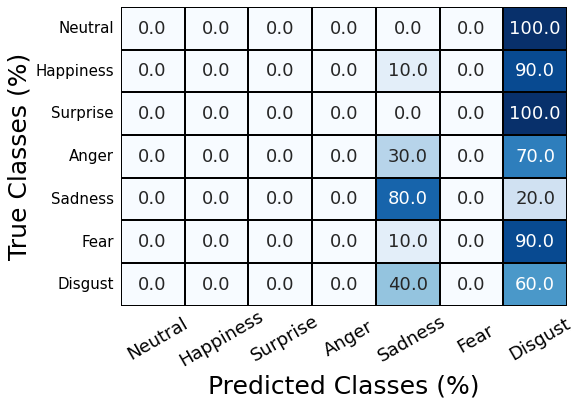

In [18]:
import seaborn as sns
cf_matrix = confusion_matrix(ls, ps)
fig, ax = plt.subplots(1,1,figsize=(8, 5.5))
print(cf_matrix) 
# OrRd
# cmap="YlGnBu",
ax = sns.heatmap(cm/cm.sum(axis=1)*100, linewidths=2, annot=True, cmap='Blues', fmt='.1f',
                 cbar=False, linecolor="black", annot_kws={"size":18})
plt.tick_params(left = False, bottom=False)
ax.xaxis.set_ticklabels(emotion_list, fontsize=15)
ax.yaxis.set_ticklabels(emotion_list, rotation = 0, fontsize=15)
ax.set_ylabel("True Classes (%)", fontsize=25)
ax.set_xlabel("Predicted Classes (%)", fontsize=25)

ax.set_xticklabels(emotion_list, fontsize=18, rotation=30,
                   rotation_mode='anchor', position=(0, -0.06))
# fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/3.FER_performance/Fig7.svg',format='svg', bbox_inches="tight")
